# Chapter 9: Dealing with Few to No Labels

## Preparing the Data

In [1]:
import pandas as pd

dataset_url = "https://git.io/nlp-with-transformers"
df_issues = pd.read_json(dataset_url, lines=True)
print(f"Dataframe shape: {df_issues.shape}")

Dataframe shape: (9930, 26)


In [2]:
df_issues.dtypes

url                                 object
repository_url                      object
labels_url                          object
comments_url                        object
events_url                          object
html_url                            object
id                                   int64
node_id                             object
number                               int64
title                               object
user                                object
labels                              object
state                               object
locked                                bool
assignee                            object
assignees                           object
milestone                          float64
comments                             int64
created_at                  datetime64[ns]
updated_at                  datetime64[ns]
closed_at                   datetime64[ns]
author_association                  object
active_lock_reason                  object
body       

In [3]:
df_issues.head()

,url,repository_url,labels_url,comments_url,events_url,html_url,id,node_id,number,title,...,milestone,comments,created_at,updated_at,closed_at,author_association,active_lock_reason,body,performed_via_github_app,pull_request
0,https://api.github.com/repos/huggingface/trans...,https://api.github.com/repos/huggingface/trans...,https://api.github.com/repos/huggingface/trans...,https://api.github.com/repos/huggingface/trans...,https://api.github.com/repos/huggingface/trans...,https://github.com/huggingface/transformers/is...,849568459,MDU6SXNzdWU4NDk1Njg0NTk=,11046,Potential incorrect application of layer norm ...,...,NaN,0,2021-04-03 03:37:32,2021-04-03 03:37:32,NaT,NONE,None,"In BlenderbotSmallDecoder, layer norm is appl...",NaN,None
1,https://api.github.com/repos/huggingface/trans...,https://api.github.com/repos/huggingface/trans...,https://api.github.com/repos/huggingface/trans...,https://api.github.com/repos/huggingface/trans...,https://api.github.com/repos/huggingface/trans...,https://github.com/huggingface/transformers/is...,849544374,MDU6SXNzdWU4NDk1NDQzNzQ=,11045,Multi-GPU seq2seq example evaluation significa...,...,NaN,0,2021-04-03 00:52:24,2021-04-03 00:52:24,NaT,NONE,None,\r\n### Who can help\r\n@patil-suraj @sgugger ...,NaN,None
2,https://api.github.com/repos/huggingface/trans...,https://api.github.com/repos/huggingface/trans...,https://api.github.com/repos/huggingface/trans...,https://api.github.com/repos/huggingface/trans...,https://api.github.com/repos/huggingface/trans...,https://github.com/huggingface/transformers/is...,849529761,MDU6SXNzdWU4NDk1Mjk3NjE=,11044,[DeepSpeed] ZeRO stage 3 integration: getting ...,...,NaN,0,2021-04-02 23:40:42,2021-04-03 00:00:18,NaT,COLLABORATOR,None,"**[This is not yet alive, preparing for the re...",NaN,None
3,https://api.github.com/repos/huggingface/trans...,https://api.github.com/repos/huggingface/trans...,https://api.github.com/repos/huggingface/trans...,https://api.github.com/repos/huggingface/trans...,https://api.github.com/repos/huggingface/trans...,https://github.com/huggingface/transformers/is...,849499734,MDU6SXNzdWU4NDk0OTk3MzQ=,11043,Can't load model to estimater,...,NaN,0,2021-04-02 21:51:44,2021-04-02 21:51:44,NaT,NONE,None,I was trying to follow the Sagemaker instructi...,NaN,None
4,https://api.github.com/repos/huggingface/trans...,https://api.github.com/repos/huggingface/trans...,https://api.github.com/repos/huggingface/trans...,https://api.github.com/repos/huggingface/trans...,https://api.github.com/repos/huggingface/trans...,https://github.com/huggingface/transformers/is...,849274362,MDU6SXNzdWU4NDkyNzQzNjI=,11042,[LXMERT] Unclear what img_tensorize does with ...,...,NaN,0,2021-04-02 15:12:57,2021-04-02 15:15:07,NaT,NONE,None,## Environment info\r\n\r\n- `transformers` ve...,NaN,None


In [4]:
cols = [
    "url",
    "id",
    "title",
    "user",
    "labels",
    "state",
    "created_at",
    "body"
]

df_issues.loc[2, ["labels"]].to_frame()

,2
labels,"[{'id': 2659267025, 'node_id': 'MDU6TGFiZWwyNj..."


In [5]:
df_issues["labels"] = (df_issues["labels"]
    .apply(lambda x: [meta["name"] for meta in x])
)

df_issues[["labels"]].head()

,labels
0,[]
1,[]
2,[DeepSpeed]
3,[]
4,[]


In [6]:
df_issues["labels"].apply(lambda x: len(x)).value_counts().to_frame().T

labels,0,1,2,3,4,5
count,6440,3057,305,100,25,3


In [7]:
df_counts = df_issues["labels"].explode().value_counts()
print(f"number of labels: {len(df_counts)}")

number of labels: 65


In [8]:
df_counts.to_frame().head(8).T

labels,wontfix,model card,Core: Tokenization,New model,Core: Modeling,Help wanted,Good First Issue,Usage
count,2284,649,106,98,64,52,50,46


In [9]:
label_map = {
    "Core: Tokenization": "tokenization",
    "New model": "new model",
    "Core: Modeling": "model training",
    "Usage": "usage",
    "Core: Pipeline": "pipeline",
    "TensorFlow": "tensorflow or tf",
    "PyTorch": "pytorch",
    "Examples": "examples",
    "Documentation": "documentation"
}

def filter_labels(x):
    return [label_map[label] for label in x if label in label_map]

df_issues["labels"] = df_issues["labels"].apply(filter_labels)
all_labels = list(label_map.values())
all_labels

['tokenization',
 'new model',
 'model training',
 'usage',
 'pipeline',
 'tensorflow or tf',
 'pytorch',
 'examples',
 'documentation']

In [10]:
df_counts = df_issues["labels"].explode().value_counts()
df_counts.to_frame().T

labels,tokenization,new model,model training,usage,pipeline,tensorflow or tf,pytorch,documentation,examples
count,106,98,64,46,42,41,37,28,24


In [11]:
df_issues["split"] = "unlabeled"
mask = df_issues["labels"].apply(lambda x: len(x)) > 0

df_issues.loc[mask, "split"] = "labeled"

df_issues["split"].value_counts().to_frame()

,count
split,
unlabeled,9489
labeled,441


In [12]:
for column in ["title", "body", "labels"]:
    print(f"{column}: {df_issues[column].iloc[26][:500]}\n")

title: Add new CANINE model

body: # 🌟 New model addition

## Model description

Google recently proposed a new **C**haracter **A**rchitecture with **N**o tokenization **I**n **N**eural **E**ncoders architecture (CANINE). Not only the title is exciting:

> Pipelined NLP systems have largely been superseded by end-to-end neural modeling, yet nearly all commonly-used models still require an explicit tokenization step. While recent tokenization approaches based on data-derived subword lexicons are less brittle than manually en

labels: ['new model']



In [13]:
df_issues["text"] = (
    df_issues.apply(lambda x: x["title"] + "\n\n" + x["body"], axis=1)
)

In [14]:
len_before = len(df_issues)
df_issues = df_issues.drop_duplicates(subset="text")
print(f"removed {(len_before - len(df_issues))/len_before:.2%} duplicates")

removed 1.88% duplicates


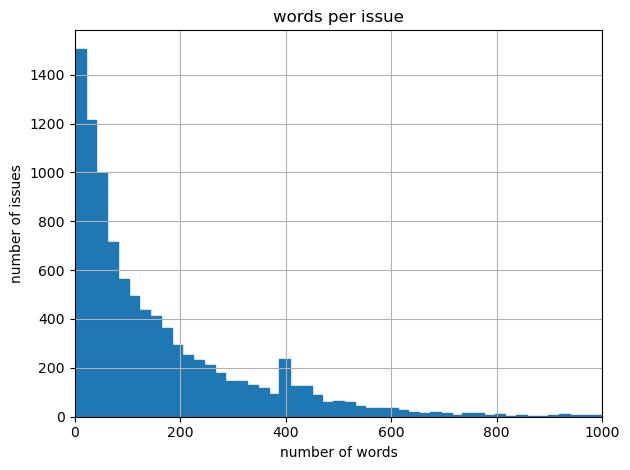

In [15]:
import numpy as np
import matplotlib.pyplot as plt

(
    df_issues["text"].str.split().apply(len)
        .hist(bins=np.linspace(0, 1000, 50), 
              grid=True, 
              edgecolor="C0"
        )
)

plt.title("words per issue")
plt.xlabel("number of words")
plt.ylabel("number of issues")
plt.xlim(0, 1000)
plt.tight_layout()
plt.show()

## Creating Training Sets

[`sklearn.preprocessing.MultiLabelBinarizer`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MultiLabelBinarizer.html)

> Transform between iterable of iterables and a multilabel format.
> <p/>
> Although a list of sets or tuples is a very intuitive format for multilabel data, it is unwieldy to process. This transformer converts between this intuitive format and the supported multilabel format: a (samples x classes) binary matrix indicating the presence of a class label.

In [16]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
mlb.fit([all_labels])

# OK, let's try mlb out on 
# 1. an issue with "tokenization" and "new model" labels
# 2. another issue with only "pytorch" label
ex1, ex2 = mlb.transform([["tokenization", "new model"], ["pytorch"]])

print(f"ex 1. \"tokenization\", \"new model\": \t{ex1}")
print(f"ex 2. \"pytorch\": \t\t\t{ex2}")

ex 1. "tokenization", "new model": 	[0 0 0 1 0 0 0 1 0]
ex 2. "pytorch": 			[0 0 0 0 0 1 0 0 0]


In [17]:
from skmultilearn.model_selection import iterative_train_test_split

?iterative_train_test_split

Signature: iterative_train_test_split(X, y, test_size)
Docstring:
Iteratively stratified train/test split

Parameters
----------
test_size : float, [0,1]
    the proportion of the dataset to include in the test split, the rest will be put in the train set

Returns
-------
X_train, y_train, X_test, y_test
    stratified division into train/test split
File:      /opt/conda/envs/transformers-py38/lib/python3.8/site-packages/skmultilearn/model_selection/iterative_stratification.py
Type:      function

In [18]:
#from skmultilearn.model_selection import iterative_train_test_split

def balanced_split(df, test_size=0.5):
    ind = np.expand_dims(np.arange(len(df)), axis=1)
    labels = mlb.transform(df["labels"])
    ind_train, _, ind_test, _ = iterative_train_test_split(ind, labels, test_size)
    return df.iloc[ind_train[:,0]], df.iloc[ind_test[:,0]]

#### What is this `from sklearn.model_selection import train_test_split` statement for?

In [19]:
#from sklearn.model_selection import train_test_split

df_clean = df_issues[["text", "labels", "split"]].reset_index(drop=True).copy()
df_unsup = df_clean.loc[df_clean["split"] == "unlabeled", ["text", "labels"]]
df_sup   = df_clean.loc[df_clean["split"] == "labeled", ["text", "labels"]]

np.random.seed(0)
df_train, df_tmp = balanced_split(df_sup, test_size=0.5)
df_valid, df_test = balanced_split(df_tmp, test_size=0.5)

In [20]:
from datasets import Dataset, DatasetDict

ds = DatasetDict({
    "train": Dataset.from_pandas(df_train.reset_index(drop=True)),
    "valid": Dataset.from_pandas(df_valid.reset_index(drop=True)),
    "test": Dataset.from_pandas(df_test.reset_index(drop=True)),
    "unsup": Dataset.from_pandas(df_unsup.reset_index(drop=True))
})

In [46]:
for k,v in ds.items():
    print(f"{k}:\n{v}\n")

train:
Dataset({
    features: ['text', 'labels'],
    num_rows: 223
})

valid:
Dataset({
    features: ['text', 'labels'],
    num_rows: 106
})

test:
Dataset({
    features: ['text', 'labels'],
    num_rows: 111
})

unsup:
Dataset({
    features: ['text', 'labels'],
    num_rows: 9303
})



## Creating Training Slices

In [21]:
np.random.seed(0)
all_indices = np.expand_dims(list(range(len(ds["train"]))), axis=1)
indices_pool = all_indices
labels = mlb.transform(ds["train"]["labels"])
train_samples = [8, 16, 32, 64, 128]
train_slices, last_k = [], 0

for i,k in enumerate(train_samples):
    # split off samples necessary to fill the gap to the next split size
    indices_pool, labels, new_slice, _ = iterative_train_test_split(
        indices_pool,
        labels,
        (k - last_k)/len(labels)
    )
    last_k = k
    if i==0: 
        train_slices.append(new_slice)
    else:
        train_slices.append(
            np.concatenate((train_slices[-1], new_slice))
        )

# add full dataset as last slice
train_slices.append(all_indices), train_samples.append(len(ds["train"]))
train_slices = [np.squeeze(train_slice) for train_slice in train_slices]

In [52]:
print("Target split sizes:")
print(train_samples)
print("Actual split sizes:")
print([len(x) for x in train_slices])

Target split sizes:
[8, 16, 32, 64, 128, 223]
Actual split sizes:
[10, 19, 36, 68, 134, 223]


In [53]:
train_slices[0]

array([ 0,  2,  9, 11, 18, 19, 45, 52, 54, 92])

In [54]:
train_slices[1]

array([  0,   2,   9,  11,  18,  19,  45,  52,  54,  92,   1,   6,  10,
        12,  41,  56,  63,  88, 110])